In [ ]:
import cv2
import matplotlib.pyplot as plt

from utils import *
from darknet import Darknet

In [2]:
# Set the location and name of the cfg file
cfg_file = './cfg/yolov3.cfg'

In [3]:
# Set the location and name of the pre-trained weights file
weight_file = './weights/yolov3.weights'

In [4]:
# Set the location and name of the COCO object classes file
namesfile = 'data/coco.names'

In [5]:
# Load the network architecture
m = Darknet(cfg_file)

In [6]:
# Load the pre-trained weights
m.load_weights(weight_file)

In [7]:
# Load the COCO object classes
class_names = load_class_names(namesfile)

In [8]:
# Print the neural network used in YOLOv3
m.print_network()

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32
    1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64
    2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32
    3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64
    4 shortcut 1
    5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128
    6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64
    7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128
    8 shortcut 5
    9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64
   10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128
   11 shortcut 8
   12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256
   13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128
   14 conv    256  3 x 3 / 1    52 x  52 x 128   ->    52 x  52 x 256
   15 shortcut 12
   16 conv    128  1 x 1

In [9]:
# Set the default figure size
plt.rcParams['figure.figsize'] = [24.0, 14.0]

In [ ]:
# Load the image
img = cv2.imread('./images/img.jpg')

# Convert the image to RGB
original_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# We resize the image to the input width and height of the first layer of the network.    
resized_image = cv2.resize(original_image, (m.width, m.height))

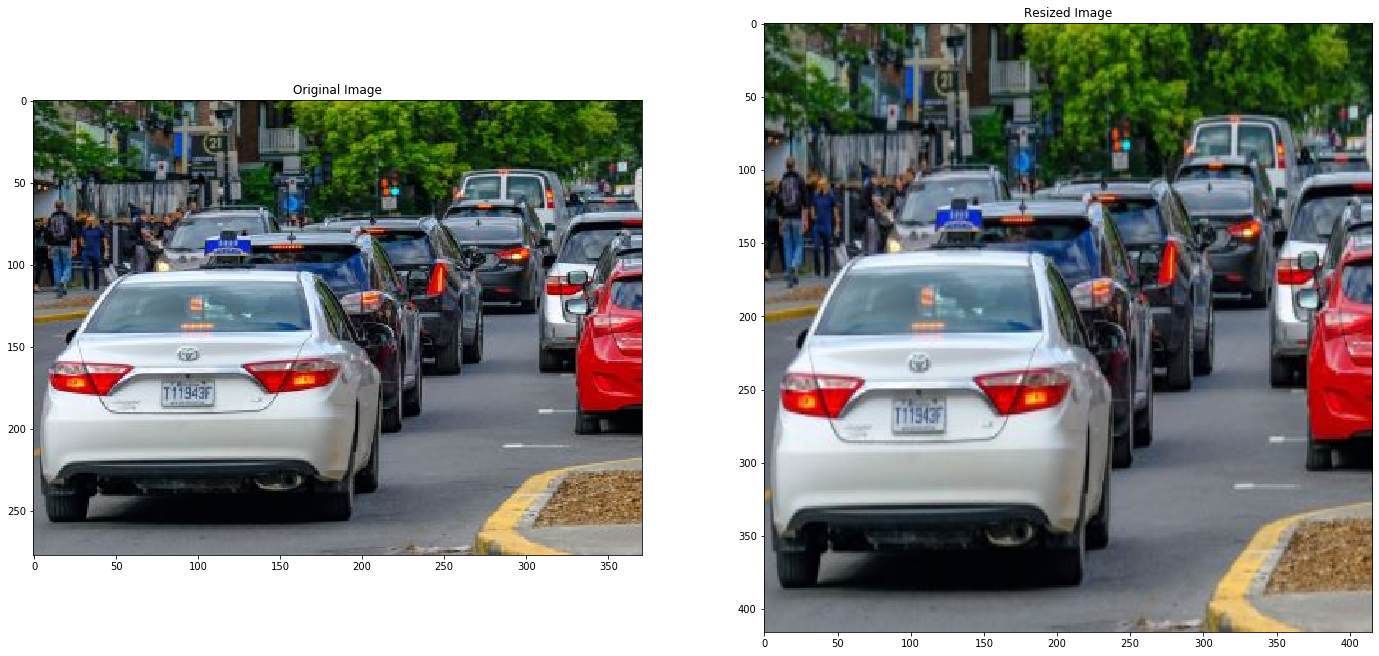

In [11]:
# Display the images
plt.subplot(121)
plt.title('Original Image')
plt.imshow(original_image)
plt.subplot(122)
plt.title('Resized Image')
plt.imshow(resized_image)
plt.show()

In [12]:
# Set the NMS threshold
nms_thresh = 0.6

In [13]:
# Set the IOU threshold
iou_thresh = 0.4

In [14]:
# Detect objects in the image
boxes = detect_objects(m, resized_image, iou_thresh, nms_thresh)



It took 4.436 seconds to detect the objects in the image.

Number of Objects Detected: 11 



In [15]:
# Print the objects found and the confidence level
print_objects(boxes, class_names)

Objects Found and Confidence Level:

1. car: 0.999995
2. car: 0.999979
3. car: 0.999503
4. person: 1.000000
5. car: 0.999991
6. person: 1.000000
7. car: 0.999669
8. car: 0.999996
9. car: 0.989749
10. person: 0.999986
11. car: 0.999694


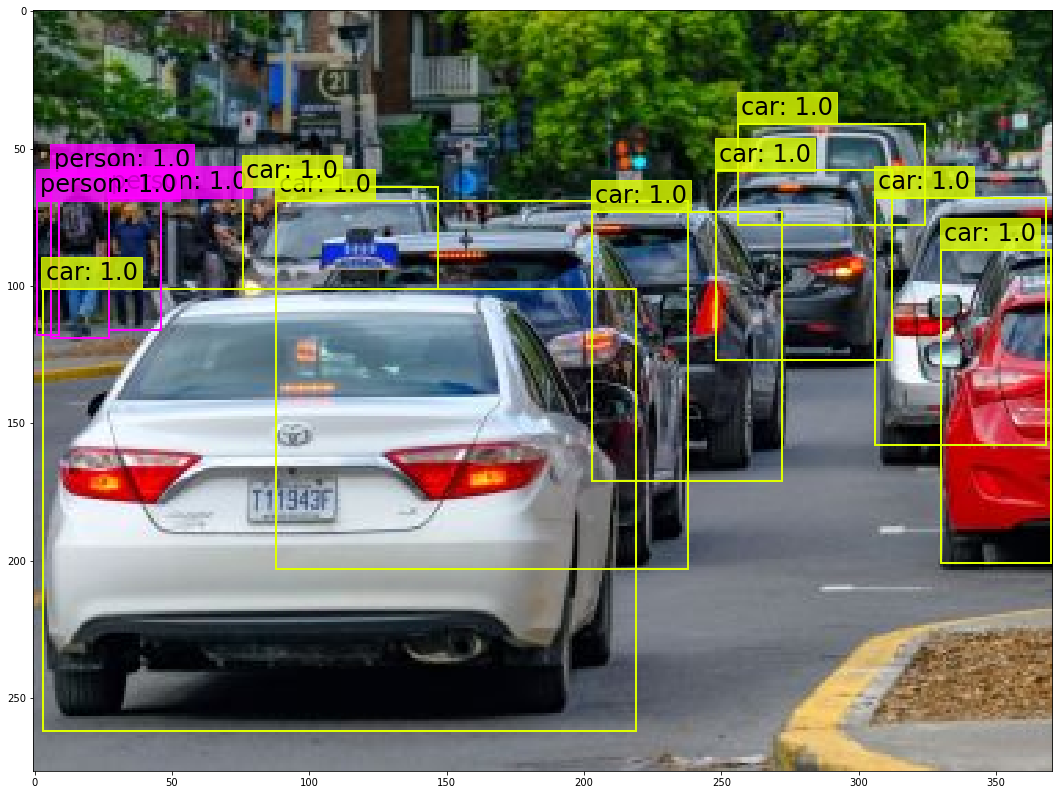

In [16]:
#Plot the image with bounding boxes and corresponding object class labels
plot_boxes(original_image, boxes, class_names, plot_labels = True)

In [ ]:
cap = cv2.VideoCapture(0)

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Our operations on the frame come here
    #original_image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
 
    # We resize the image to the input width and height of the first layer of the network.    
    resized_image = cv2.resize(original_image, (m.width, m.height))
    
    # Detect objects in the image
    boxes = detect_objects(m, resized_image, iou_thresh, nms_thresh)
    
    #Plot the image with bounding boxes and corresponding object class labels
    plot_boxes(original_image, boxes, class_names, plot_labels = True)

    # Display the resulting frame
    cv2.imshow('frame',original_image)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

